In [40]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

カーネル密度関数に関する説明
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

(0, 1)

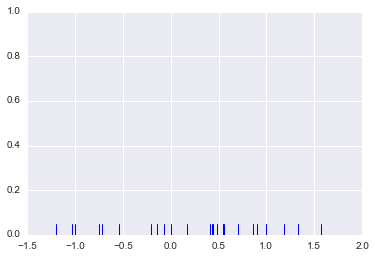

In [45]:
dataset = randn(25)
# rugplotを書きます
sns.rugplot(dataset)
plt.ylim(0,1)

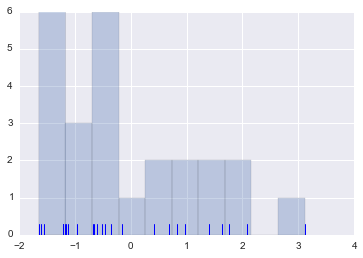

In [4]:
# ヒストグラムを重ねます。
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

バンド幅の推定<br>
http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0, 1)

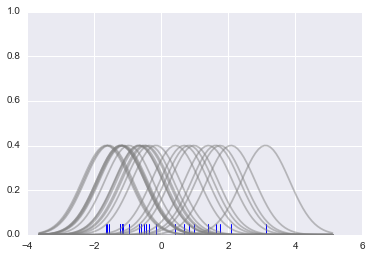

In [38]:
sns.rugplot(dataset);

# X軸を競ってい
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

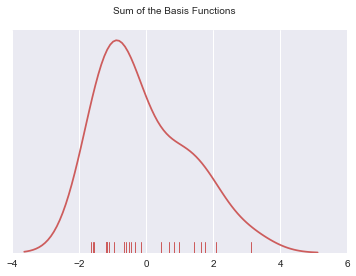

In [41]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c = 'indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

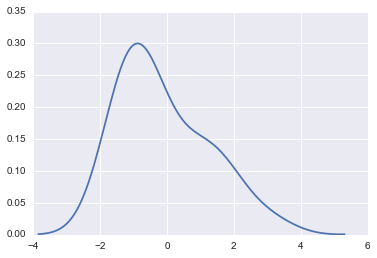

In [12]:
# これが1行で出来ます。
sns.kdeplot(dataset)

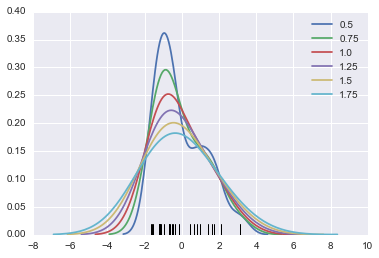

In [17]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

カーネル関数の説明（英語）<br>
http://en.wikipedia.org/wiki/Kernel_(statistics)

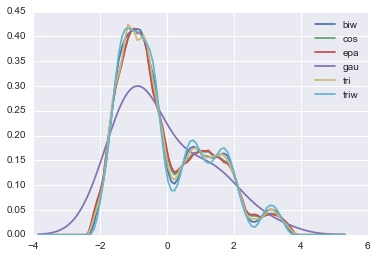

In [36]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

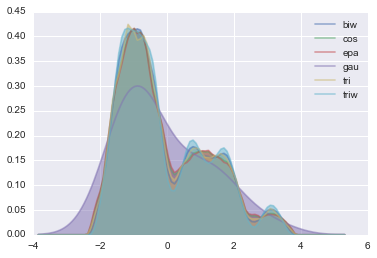

In [34]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

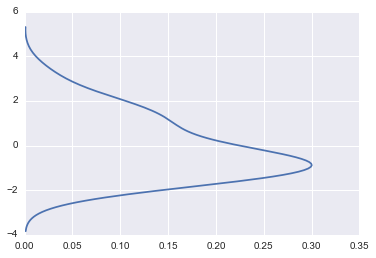

In [21]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset,vertical=True)

cumulative distribution function (CDF)<br>
累積分布関数<br>
http://en.wikipedia.org/wiki/Cumulative_distribution_function

(array([  6.,   9.,  15.,  16.,  18.,  20.,  22.,  24.,  24.,  25.]),
 array([-1.64681409, -1.17059479, -0.6943755 , -0.21815621,  0.25806309,
         0.73428238,  1.21050167,  1.68672096,  2.16294026,  2.63915955,
         3.11537884]),
 <a list of 10 Patch objects>)

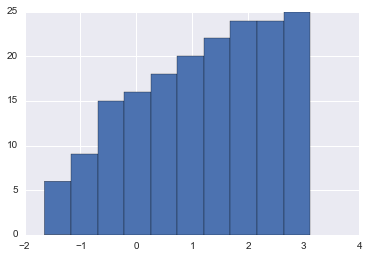

In [43]:
plt.hist(dataset, cumulative=True)

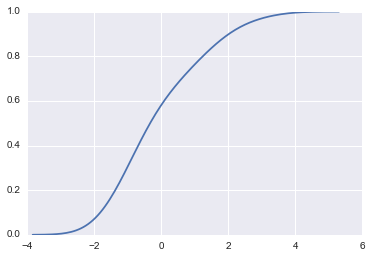

In [23]:
sns.kdeplot(dataset,cumulative=True)

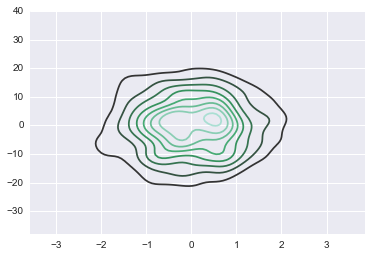

In [25]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

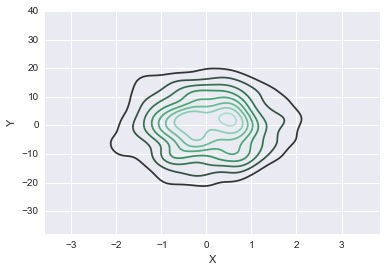

In [26]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y)

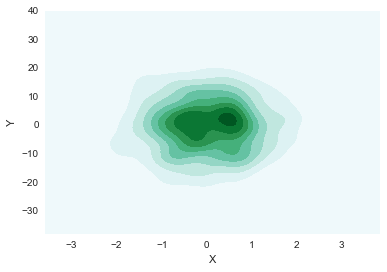

In [27]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y, shade=True)

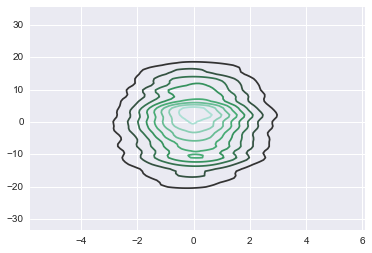

In [29]:
# バンド幅を変えられます。
sns.kdeplot(dframe,bw=1)

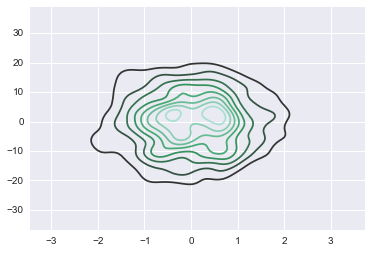

In [30]:
# 文字列でも渡せます。
sns.kdeplot(dframe,bw='silverman')

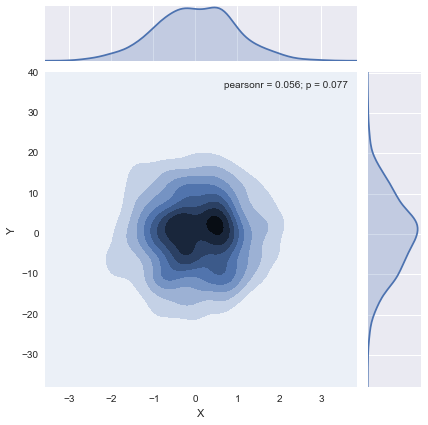

In [31]:
# 同時分布の推定も可能です。
sns.jointplot('X','Y',dframe,kind='kde')